In [1]:
import hashlib, os
from skimage.io import imread
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import sys
import cv2

In [2]:
path_ = "/home/m/Downloads/github"
path = os.chdir(path_) # change current working directories to "/home/m/Downloads/github"
current_directory=os.getcwd()
image_files = os.listdir(path) # list all the available images in the directory
print(image_files) #list of images

['3.jpg', '7.jpg', '12.jpg', '4.jpg', '2.jpg', '11.jpg', '8.jpg', '1.jpg', '6.jpg', '10.jpg', '9.jpg', '5.jpg']


In [3]:
save_to = "/home/m/Downloads/github_resized" # path to save the resized images

def resize():
    for image in image_files:
        img = cv2.imread(image) # read the image file
        dimension = (200,200) # set the dimension
        resized = cv2.resize(img, dimension, interpolation = cv2.INTER_AREA) #resize the image 
        #cv2.imshow(f'output_{image}', resized) #
        cv2.imwrite(os.path.join(save_to , f'resized_{image}'), resized) # save the output images to save_to folder
                                                
        #cv2.waitKey(0)
        #cv2.destroyAllWindows()

In [4]:
resize()

In [5]:
os.listdir(save_to)

['resized_5.jpg',
 'resized_3.jpg',
 'resized_1.jpg',
 'resized_8.jpg',
 'resized_2.jpg',
 'resized_9.jpg',
 'resized_4.jpg',
 'resized_7.jpg',
 'resized_12.jpg',
 'resized_6.jpg',
 'resized_10.jpg',
 'resized_11.jpg']

In [6]:
def check_replicate():
    hashes = [] #Create a list to save the hashes of the images
    for idx, fname in enumerate(os.listdir(current_directory)):
        hash_md5 = hashlib.md5() # create the hash object
        with open(fname, "rb") as f:
            for chunk in iter(lambda: f.read(4096), b""): #To read chunks of 4096 bytes sequentially & fed to md5
                hash_md5.update(chunk)
            hashes.append(hash_md5.hexdigest())
            
    dic = {}
    replicates = []
    for idx, hashit in enumerate(hashes):
        if hashit not in dic:
            dic.update({hashit:idx})
        else:
            replicates.append((dic[hashit], idx))
            
    return replicates
    
def plot_replicate(replicates):
    for replicate in replicates[:3]:
        plt.subplot(121)
        plt.imshow(imread(image_files[replicate[1]]))
        plt.title(replicate[1]), plt.xticks([]), plt.yticks([])

        plt.subplot(122)
        plt.imshow(imread(image_files[replicate[0]]))
        plt.title(str(replicate[0]) + ' replicate'), plt.xticks([]), plt.yticks([])
        plt.show()

In [7]:
replicates = check_replicate()

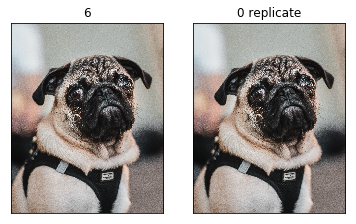

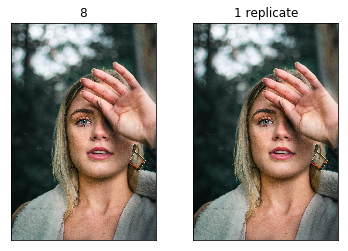

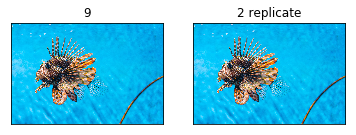

In [8]:
plot_replicate(replicates)

In [ ]:
def remove_replicate():
    replicates = check_replicate()
    for replicate in replicates:
        os.remove(image_files[replicate[1]])
    return f'The length of the files after replicate removal: {len(image_files)}'